<a href="https://colab.research.google.com/github/Russy-Veemon/Medical-Data-Visualizer/blob/main/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
me = pd.read_csv('medical_examination.csv')

# create extra column for overweight that calculate BMI, >25 is 1 else is 0
me['overweight'] = me['weight']/((me['height']/100)**2)
me['overweight'] = me['overweight'].apply(lambda x: 1 if x >= 25 else 0)
# normalize cholesterol and gluc columns to 1-0 scale, >1 is 1 else is 0
me['cholesterol'] = me['cholesterol'].apply(lambda x: 1 if x > 1 else 0)
me['gluc'] = me['gluc'].apply(lambda x: 1 if x > 1 else 0)

print(me)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            0     0   
1          1  20228    1     156    85.0    140     90            1     0   
2          2  18857    1     165    64.0    130     70            1     0   
3          3  17623    2     169    82.0    150    100            0     0   
4          4  17474    1     156    56.0    100     60            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            0     0   
69996  99995  22601    1     158   126.0    140     90            1     1   
69997  99996  19066    2     183   105.0    180     90            1     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  overweight  
0          0     0       1

In [56]:
# convert dataset to long format
me_long = pd.melt(me, id_vars=['id', 'cardio'],
                  # items that will stay the same and not become long format
                  # id_vars=['id', 'age', 'sex', 'weight', 'height',  'ap_hi', 'ap_lo', ],
                  value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'], 
                  var_name='variable', value_name='value')

# print the first few rows of the long format dataset
print(me_long)
# line of code to see how the id relationship carries over in long format
# me_long_subset = me_long.loc[(me_long['id'] >= 1) & (me_long['id'] <= 3)]
# print(me_long_subset)



           id  cardio variable  value
0           0       0   active      1
1           1       1   active      1
2           2       1   active      0
3           3       1   active      1
4           4       0   active      0
...       ...     ...      ...    ...
419995  99993       0    smoke      1
419996  99995       1    smoke      0
419997  99996       1    smoke      0
419998  99998       1    smoke      0
419999  99999       0    smoke      0

[420000 rows x 4 columns]


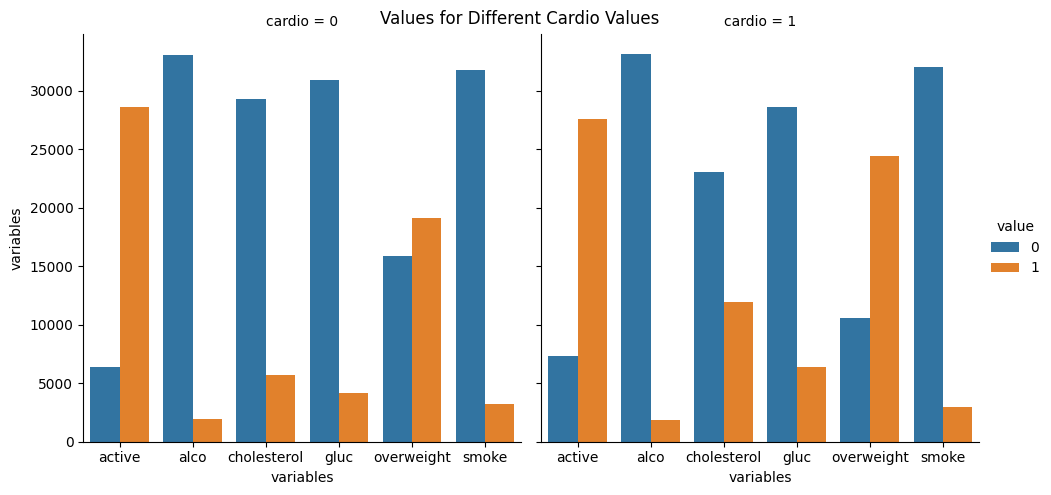

In [59]:
# Create catplot with value counts of each categorical feature for the different cardio values
g = sns.catplot(x='variable', col='cardio', hue='value', data=me_long, kind='count')

# Set axis labels and title
g.set_axis_labels('variables', 'variables')
g.fig.suptitle('Values for Different Cardio Values')

# Show the plot
plt.show()


In [ ]:
# Clean the data first, then create the graph, cholesterol and glucose are on a 3 number grading scale, normalize it to a 0 or 1 scale using python

# # import pandas as pd

# # # me = pd.read_csv('medical_examination.csv')
# # # print(me.columns)

# # # cholesterol, gluc, alco, active, and smoke
# # # Read the CSV file into a pandas dataframe
# # me = pd.read_csv('medical_examination.csv')

# # #calculate the counts for each column
# # counts = me['cholesterol'].value_counts()

# # colors = ['blue', 'orange', 'green']  # set colors for each bar

# # #create a bar chart using matplotlib
# # plt.bar(counts.index, counts.values, color=colors)
# # plt.xticks(counts.index, ['Not overweight', 'Overweight', 'Obesity'])  # set labels for each bar
# # plt.xlabel('Weight Category')
# # plt.ylabel('Number of People')
# # plt.title('Distribution of Weight Categories')
# # plt.show()